In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression

[938.23786125]
mean squared error 2548.0723987259703
coeffiecient of determination 0.47257544798227136


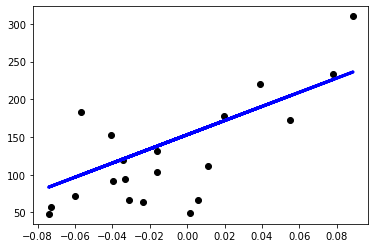

In [2]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y = True)
diabetes_X = diabetes_X[:, np.newaxis, 2]
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = regr.predict(diabetes_X_test)
print(regr.coef_)
print("mean squared error", mean_squared_error(diabetes_y_test, diabetes_y_pred))
print("coeffiecient of determination", r2_score(diabetes_y_test, diabetes_y_pred))
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)


# Redge Regression

# Ridge Classifier

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import RidgeClassifier
X, y = load_breast_cancer(return_X_y = True)
clf = RidgeClassifier().fit(X, y)
clf.score(X, y)

0.9595782073813708

# Lasso

In [4]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])
reg.predict([[1, 1]])

array([0.8])

In [5]:
n_samples, n_features = 50, 100
X = np.random.randn(n_samples, n_features)
idx = np.arange(n_features)
coef = (-1) ** idx * np.exp(-idx / 10)
coef[10:] = 0
y = np.dot(X, coef)
y += 0.01 * np.random.normal(size = n_samples)
n_sample = X.shape[0]
lasso = linear_model.Lasso(alpha=0.1)
Xtrain, ytrain = X[:n_samples // 2], y[:n_samples // 2]
Xtest, ytest = X[n_samples // 2:], y[n_samples // 2:]
y_pred_lasso = lasso.fit(Xtrain, ytrain).predict(Xtest)
r2_score_lasso = r2_score(ytest, y_pred_lasso)
print(r2_score_lasso)

0.37035467802410715


# Elastic Net

In [6]:
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.datasets import make_regression

In [7]:
X, y = make_regression(n_features=2, random_state=0)
regr = ElasticNet(random_state=0)
regr.fit(X, y)
print(regr.coef_)
print(regr.intercept_)
print(regr.predict([[0, 0]]))

[18.83816048 64.55968825]
1.4512607561654045
[1.45126076]


In [8]:
regr = ElasticNetCV(random_state = 0)
regr.fit(X, y)
print(regr.coef_)
print(regr.intercept_)
print(regr.predict([[0, 0]]))

[26.36379145 87.65898443]
0.39888296542767954
[0.39888297]


In [9]:
from sklearn.linear_model import LassoLars
reg = linear_model.LassoLars(alpha = .1)
reg.fit([[0, 0], [1, 1]], [0, 1])
reg.coef_

array([0.71715729, 0.        ])

In [10]:
from sklearn.linear_model import OrthogonalMatchingPursuit
reg = OrthogonalMatchingPursuit()
reg.fit([[0, 0], [1, 1]], [0, 1])
print(reg.predict([[1, 2]]))
reg.coef_

[1.]


array([1., 0.])

# BayesianRidge

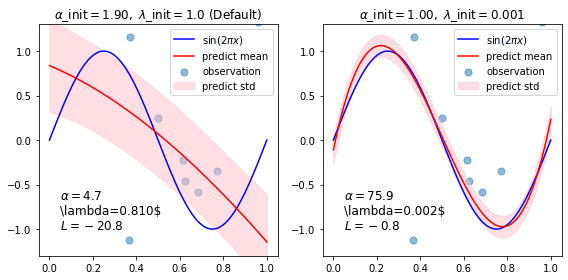

In [11]:
from sklearn.linear_model import BayesianRidge

def func(x): return np.sin(2 * np.pi * x)
size = 25
rng = np.random.RandomState(1234)
x_train = rng.uniform(0., 1., size)
y_train = func(x_train) + rng.normal(scale=0.1, size=size)
x_test = np.linspace(0., 1., 100)
n_order = 3
X_train = np.vander(x_train, n_order + 1, increasing=True)
X_test = np.vander(x_test, n_order + 1, increasing=True)
reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axes):
    if i == 0:
        init=[1/np.var(y_train), 1.]
    elif i == 1:
        init = [1, 1e-3]
        reg.set_params(alpha_init=init[0], lambda_init = init[1])
    reg.fit(X_train, y_train)
    ymean, ystd = reg.predict(X_test, return_std=True)
    ax.plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
    ax.scatter(x_train, ytrain, s=50, alpha=0.5, label="observation")
    ax.plot(x_test, ymean, color="red", label="predict mean")
    ax.fill_between(x_test, ymean-ystd, ymean+ ystd, color="pink", alpha=0.5, label="predict std")
    ax.set_ylim(-1.3, 1.3)
    ax.legend()
    title = "$\\alpha$_init$={:.2f}, \\ \\lambda$_init$={}$".format(init[0], init[1])
    if i == 0:
        title += " (Default)"
    ax.set_title(title, fontsize=12)
    text = "$\\alpha={:.1f}$\n\\lambda={:.3f}$\n$L={:.1f}$".format(reg.alpha_, reg.lambda_, reg.scores_[-1])
    ax.text(0.05, -1.0, text, fontsize=12)
plt.tight_layout()
plt.show()

In [12]:
X = [[0, 0], [1, 1], [2, 2], [3, 3]]
Y = [0, 1, 2, 3]
reg = BayesianRidge()
reg.fit(X, Y)
reg.predict([[1, 0]])

array([0.50000013])

In [13]:
reg.coef_

array([0.49999993, 0.49999993])

# TweedieRegressor

In [14]:
from sklearn.linear_model import TweedieRegressor
reg = TweedieRegressor(power=1, alpha=0.5, link='log')
reg.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2])
print(reg.coef_)
print(reg.intercept_)
reg.predict([[2, 1]])

[0.24631611 0.43370317]
-0.7638091359123443


array([1.17647921])

# SGDClassifier

In [15]:
from sklearn.linear_model import SGDClassifier
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = SGDClassifier(loss='hinge', max_iter=5)
clf.fit(X, y)
print(clf.predict([[2, 2]]))
print(clf.coef_)
clf.intercept_

[1]
[[9.91080278 9.91080278]]


c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([-9.99002993])

In [16]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y = True)
clf = Perceptron(tol=1e-3)
clf.fit(X, y)
clf.score(X, y)

0.9393433500278241

In [17]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_features=4, random_state=0)
clf = PassiveAggressiveClassifier(max_iter = 1000, random_state=0, tol=1e-3)
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.predict([[0, 0, 0, 0]]))

[[0.26642044 0.45070924 0.67251877 0.64185414]]
[1.84127814]
[1]


# Robustness regression

Estimated coefficients (true, linear regression, RANSAC)
coef [54.17236387] [82.08533159]


Text(0, 0.5, 'Response')

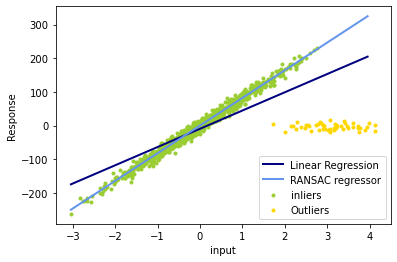

In [18]:
from sklearn import linear_model, datasets
n_samples = 1000
n_outliers = 50
X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1, n_informative=1, noise=10,
                                      coef=True, random_state=0)
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)
lr = linear_model.LinearRegression()
lr.fit(X, y)

ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)
print("Estimated coefficients (true, linear regression, RANSAC)")
print("coef", lr.coef_, ransac.estimator_.coef_)

lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], c="yellowgreen",marker='.', label="inliers")
plt.scatter(X[outlier_mask], y[outlier_mask], c='gold', marker='.', label='Outliers')
plt.plot(line_X, line_y, color="navy", linewidth=lw, label="Linear Regression")
plt.plot(line_X, line_y_ransac, color="cornflowerblue", linewidth=lw, label="RANSAC regressor")
plt.legend(loc='lower right')
plt.xlabel("input")
plt.ylabel("Response")

# Polynomial Features

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression(fit_intercept=False))])
x = np.arange(5)
y = 3 - 2 * x + x ** 2 - x ** 3
model = model.fit(x[:, np.newaxis], y)
model.named_steps['linear'].coef_

array([ 3., -2.,  1., -1.])

# Linear Discriminant Analysis

In [20]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
clf.predict([[-0.8, -1]])

array([1])

# Quadratic Discriminant Analysis

In [21]:
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = QuadraticDiscriminantAnalysis()
clf.fit(X, y)
clf.predict([[-0.8, -1]])

array([1])

# Kernel Ridge Regression

In [22]:
from sklearn.kernel_ridge import KernelRidge
import numpy as np
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
clf = KernelRidge(alpha=1.0)
clf.fit(X, y)

KernelRidge(alpha=1.0)

# Support Vector Machine

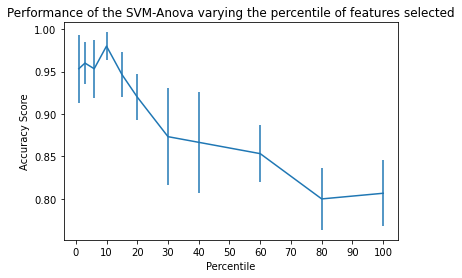

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
X, y = load_iris(return_X_y=True)
np.random.seed(0)
X = np.hstack((X, 2 * np.random.random((X.shape[0], 36))))
clf = Pipeline([('anova', SelectPercentile(chi2)), ('scaler', StandardScaler()), ('svc', SVC(gamma="auto"))])
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)
for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())
    
plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title('Performance of the SVM-Anova varying the percentile of features selected')
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel('Percentile')
plt.ylabel("Accuracy Score")
plt.axis('tight')
plt.show()

# SVR 

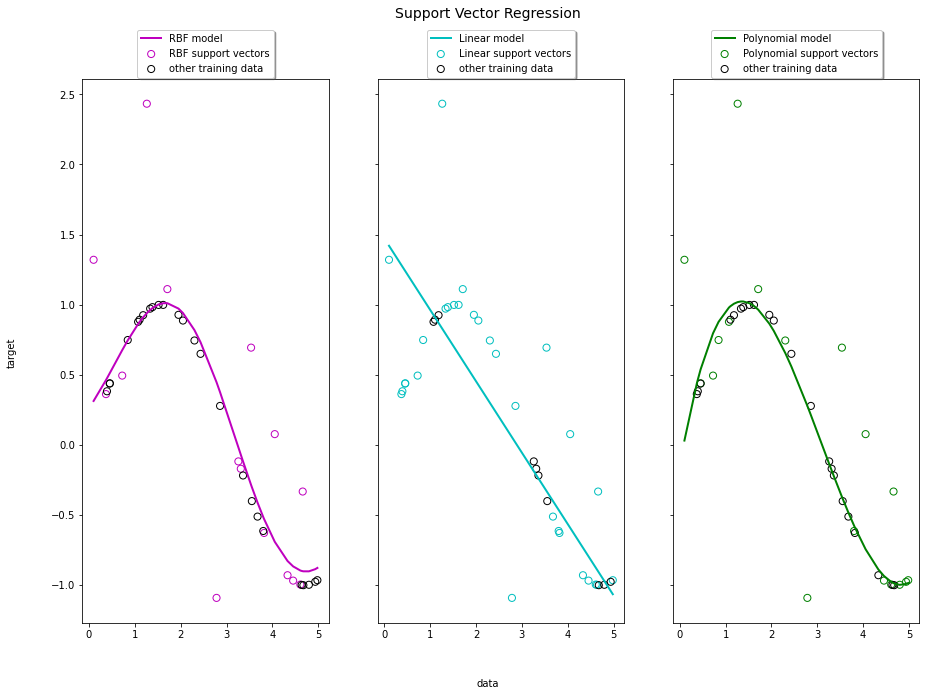

In [24]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(8))
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel="linear", C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
lw =2
svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw, label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none", edgecolor=model_color[ix], s=50, 
                    label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)], y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor='k', s=50, 
                    label='other training data')
    axes[ix].legend(loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=1, fancybox=True, shadow=True)
fig.text(0.5, 0.04, 'data', ha='center', va="center")
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

# Unsupervised Learning

# Nearest Neighbors

In [25]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
indices

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]], dtype=int32)

In [26]:
distances

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356]])

In [27]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1.]])

# KD Tree

In [30]:
from sklearn.neighbors import KDTree
import numpy as np
rng = np.random.RandomState(0)
X = rng.random_sample((10, 3))
tree = KDTree(X, leaf_size=2)
dist, ind = tree.query(X[:1], k = 3)
X

array([[0.5488135 , 0.71518937, 0.60276338],
       [0.54488318, 0.4236548 , 0.64589411],
       [0.43758721, 0.891773  , 0.96366276],
       [0.38344152, 0.79172504, 0.52889492],
       [0.56804456, 0.92559664, 0.07103606],
       [0.0871293 , 0.0202184 , 0.83261985],
       [0.77815675, 0.87001215, 0.97861834],
       [0.79915856, 0.46147936, 0.78052918],
       [0.11827443, 0.63992102, 0.14335329],
       [0.94466892, 0.52184832, 0.41466194]])

In [31]:
ind

array([[0, 3, 1]], dtype=int32)

In [32]:
dist

array([[0.        , 0.19662693, 0.29473397]])

In [33]:
rng = np.random.RandomState(42)
X = rng.random_sample((100, 3))
tree = KDTree(X)
tree.kernel_density(X[:3], h=0.1, kernel='gaussian')

array([ 97.37160967, 168.6409    , 127.70081271])

# KNeighborsClassifier and Regressor

In [42]:
from sklearn.neighbors import KNeighborsClassifier
X = [[0], [1], [2], [3]]
y =  [0, 0, 1, 1]
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
print(neigh.predict([[1.1]]))
print(neigh.predict_proba([[0.9]]))

[0]
[[0.66666667 0.33333333]]


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

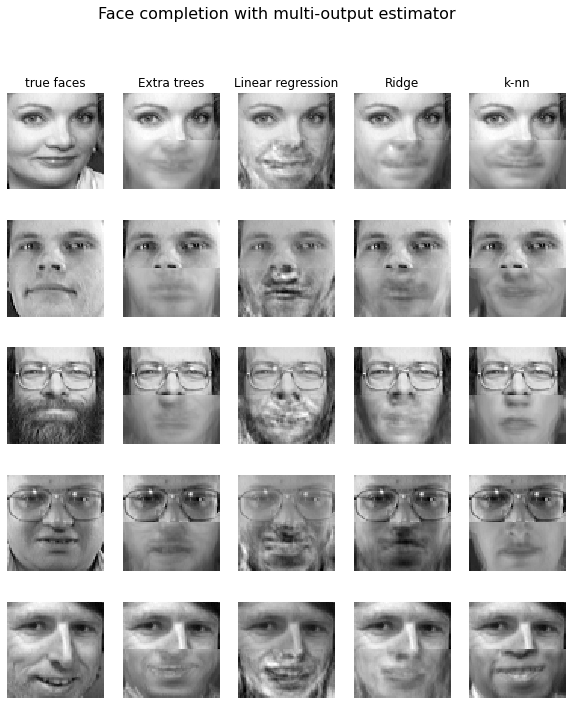

In [56]:
data, targets = fetch_olivetti_faces(return_X_y=True)
train = data[targets < 30]
test = data[targets >= 30]

n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]
n_pixels = data.shape[1]

X_train = train[:, :(n_pixels + 1) // 2]
y_train = train[:, npixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32, random_state=0),
    "k-nn":KNeighborsRegressor(),
    "Linear regression":LinearRegression(),
    "Ridge":RidgeCV()
}
y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)
    
image_shape = (64, 64)
n_cols = 1+ len(ESTIMATORS)
plt.figure(figsize=(2.*n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimator", size=16)
for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))
    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")
    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")
    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))
        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)
        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)
        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")
plt.show()       

# NearestCentroidClassifier and NearestComponentAnalysis

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import NearestCentroid

None 0.8133333333333334
0.2 0.82


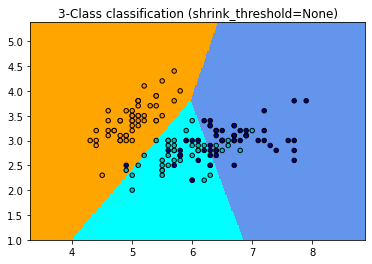

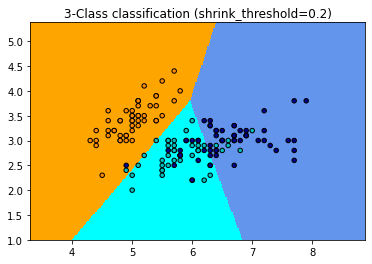

In [60]:
n_neighbors = 15
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
h = .02
cmap_light = ListedColormap(["orange", "cyan", 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
for shrinkage in [None, .2]:
    clf = NearestCentroid(shrink_threshold = shrinkage)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(shrinkage, np.mean(y == y_pred))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title("3-Class classification (shrink_threshold=%r)"%shrinkage)
    plt.axis('tight')
plt.show()

In [62]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.7, random_state=42)
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)
print(nca_pipe.score(X_test, y_test))

0.9619047619047619


# GaussianProcess

In [5]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
X, y = make_friedman2(n_samples=500, noise=0, random_state=0)
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(X, y)
print(gpr.score(X, y))
gpr.predict(X[:2, :], return_std=True)

0.3680293861017373


(array([653.08792288, 592.16905327]), array([316.68016218, 316.65121679]))

In [6]:
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
X, y = load_iris(return_X_y=True)
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0).fit(X, y)
print(gpc.score(X, y))
gpc.predict_proba(X[:2, :])

0.9866666666666667


array([[0.83548752, 0.03228706, 0.13222543],
       [0.79064206, 0.06525643, 0.14410151]])

# Cross Decomposition

In [9]:
from sklearn.cross_decomposition import PLSCanonical
X = [[0, 0, 1], [1, 0, 0], [2, 2, 2], [2, 5, 4]]
y = [[0.1, -0.2], [0.9, 1.1], [6.2, 5.9], [11.9, 12.3]]
plsca = PLSCanonical(n_components=2)
plsca.fit(X, y)
X_c, Y_c = plsca.transform(X, y)

In [12]:
from sklearn.cross_decomposition import PLSSVD
import numpy as np
X = np.array([
    [0, 0, 1],
    [1, 0, 0],
    [2, 2, 2],
    [2, 5, 4]
])
Y = np.array([
    [0.1, -0.2],
    [0.9, 1.1],
    [6.2, 5.9],
    [11.9, 12.3]
])
pls = PLSSVD(n_components=2).fit(X, y)
X_c, Y_c = pls.transform(X, y)
X_c.shape, Y_c.shape

((4, 2), (4, 2))

# Naive Bayes

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total", X_test.shape[0], "points :", (y_test != y_pred).sum())

Number of mislabeled points out of a total 75 points : 4


In [18]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)
print(clf.predict(X[2:3]))

[3]


In [22]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB().fit(X, y)
clf.predict(X[2:3])

array([3])

In [23]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])
from sklearn.naive_bayes import ComplementNB
clf = ComplementNB().fit(X, y)
clf.predict(X[2:3])

array([3])

In [24]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB().fit(X, y)
clf.predict(X[2:3])

array([3])

# Decision Tree

### Classification

In [2]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf.fit(X, Y)
clf.predict([[2, 2]])

array([1])

In [3]:
clf.predict_proba([[2, 2]])

array([[0., 1.]])

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

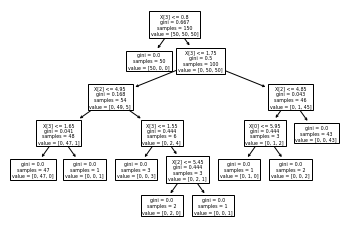

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X, y = iris.data, iris.target
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)

In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris["feature_names"])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



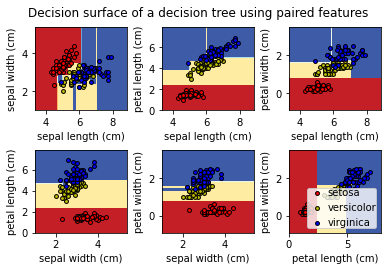

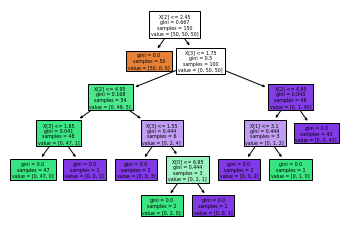

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
iris = load_iris()
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target
    clf = DecisionTreeClassifier().fit(X, y)
    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.RdYlBu, edgecolor="black", s=15)
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.axis("tight")
plt.figure()
clf=DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

### Regressor

In [13]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([0.5])

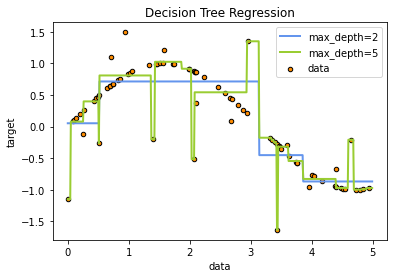

In [17]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)
X_test = np.arange(0.0, 5, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c = "darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

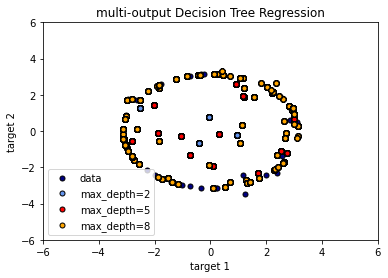

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += (0.5 - rng.rand(20, 2))

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

X_test = np.arange(-100, 100, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

plt.figure()
s = 25
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s, edgecolor="black", label="data")
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s, edgecolor="black", label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s, edgecolor="black", label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s, edgecolor="black", label="max_depth=8")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()

# Ensemble

## Bagging

Tree : 0.0201 (error) = 0.0002 (bias^2) + 0.0099 (var) + 0.0098 (noise)
Bagging(Tree) : 0.0152 (error) = 0.0001 (bias^2) + 0.0052 (var) + 0.0098 (noise)


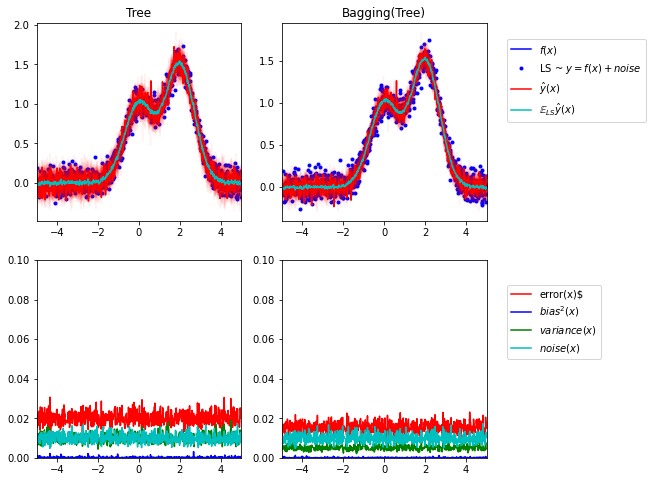

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
n_repeat = 50
n_train = 50
n_test = 1000
noise = 0.1
np.random.seed(0)
estimators = [("Tree", DecisionTreeRegressor()), ("Bagging(Tree)", BaggingRegressor(DecisionTreeRegressor()))]
n_estimators = len(estimators)
def f(x):
    x = x.ravel()
    return np.exp(-x**2) + 1.5 * np.exp(-(x-2) **2)

def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)
    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))
        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y


X_train = []
y_train = []

for i in range(n_repeat):
    X, y = generate(n_samples=n_test, noise=noise)
    X_train.append(X)
    y_train.append(y)
    
X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)
plt.figure(figsize=(10, 8))
for n, (name, estimator) in enumerate(estimators):
    y_predict = np.zeros((n_test, n_repeat))
    for i in range(n_repeat):
        estimator.fit(X_train[i], y_train[i])
        y_predict[:, i] = estimator.predict(X_test)
    y_error = np.zeros(n_test)
    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:, j] - y_predict[:, i]) ** 2
    y_error /= (n_repeat * n_repeat)
    y_noise = np.var(y_test, axis=1)
    y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
    y_var = np.var(y_predict, axis=1)
    
    print("{0} : {1:.4f} (error) = {2:.4f} (bias^2) + {3:.4f} (var) + {4:.4f} (noise)".format(name, np.mean(y_error),
                                                                                             np.mean(y_bias), np.mean(y_var)
                                                                                             , np.mean(y_noise)))
    plt.subplot(2, n_estimators, n + 1)
    plt.plot(X_test, f(X_test), "b", label="$f(x)$")
    plt.plot(X_train[0], y_train[0], ".b", label="LS ~ $y = f(x) + noise$")
    
    for i in range(n_repeat):
        if i == 0:
            plt.plot(X_test, y_predict[:, 1], "r", label=r"$\^y(x)$")
        else:
            plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)
    plt.plot(X_test, np.mean(y_predict, axis=1), "c", label=r"$\mathbb{E}_{LS} \^y(x)$")
    plt.xlim([-5, 5])
    plt.title(name)
    if n==n_estimators - 1:
        plt.legend(loc=(1.1, .5))
    plt.subplot(2, n_estimators, n_estimators + n+ 1)
    plt.plot(X_test, y_error, "r", label="error(x)$")
    plt.plot(X_test, y_bias, "b", label="$bias^2(x)$")
    plt.plot(X_test, y_var, 'g', label="$variance(x)$")
    plt.plot(X_test, y_noise, "c", label="$noise(x)$")
    
    plt.xlim([-5, 5])
    plt.ylim([0, 0.1])
    if n == n_estimators - 1:
        plt.legend(loc=(1.1, .5))
plt.subplots_adjust(right=.75)
plt.show()

In [16]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0).fit(X, y)
clf.predict([[0, 0, 0, 0]])

array([1])

### RandomForestClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
clf.predict([[0, 0, 0, 0]])

array([1])

### RandomForestRegressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
regr.predict([[0, 0, 0, 0]])

array([-8.32987858])

### Extra Tree

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_features=4, random_state=0)
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
clf.predict([[0, 0, 0, 0]])

array([1])

In [30]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
reg.score(X_test, y_test)

0.27081747066124695

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
X, y = make_blobs(n_samples=10000, n_features=10, centers=100, random_state=0)
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())

clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())

clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())
scores.mean() > 0.999

0.9823000000000001
0.9997
1.0


True

DecisionTree with features [0, 1] has a score of 0.9266666666666666
RandomForest with features [0, 1] has a score of 0.9266666666666666
ExtraTrees with features [0, 1] has a score of 0.9266666666666666
AdaBoost with features [0, 1] has a score of 0.8533333333333334
DecisionTree with features [0, 2] has a score of 0.9933333333333333
RandomForest with features [0, 2] has a score of 0.9933333333333333
ExtraTrees with features [0, 2] has a score of 0.9933333333333333
AdaBoost with features [0, 2] has a score of 0.9933333333333333
DecisionTree with features [2, 3] has a score of 0.9933333333333333
RandomForest with features [2, 3] has a score of 0.9933333333333333
ExtraTrees with features [2, 3] has a score of 0.9933333333333333
AdaBoost with features [2, 3] has a score of 0.9933333333333333


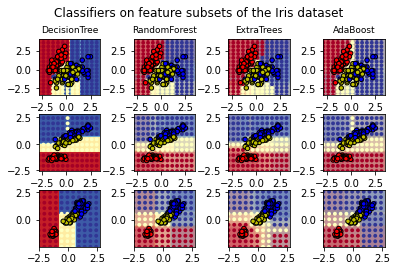

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

iris = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None), RandomForestClassifier(n_estimators = n_estimators),
         ExtraTreesClassifier(n_estimators=n_estimators),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators = n_estimators)]
for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        X = iris.data[:, pair]
        y = iris.target
        
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std
        model.fit(X, y)
        scores = model.score(X, y)
        model_title = str(type(model)).split(".")[-1][:-2][:-len("classifier")]
        
        model_detail = model_title
        if hasattr(model, "estimator_"):
            model_detail += " with {} estimators".format(len(model.estimators_))
        print(model_detail + " with features", pair, "has a score of", scores)
        plt.subplot(3, 4, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)
        
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)
        
        xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                             np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(), yy_coarser.ravel()]).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15, c=Z_points_coarser, cmap=cmap, edgecolors="none")
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['r', 'y', 'b']), edgecolor='k', s=20)
        plot_idx += 1
plt.suptitle("Classifiers on feature subsets of the Iris dataset", fontsize=12)
plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

Fitting ExtraTreesClassifier on faces data with 1 cores....
done in 3.363s


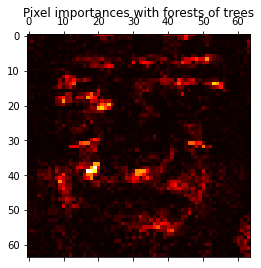

In [11]:
from time import time
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier

n_jobs = 1
data = fetch_olivetti_faces()
X, y = data.data, data.target

mask = y < 5
X = X[mask]
y = y[mask]

print("Fitting ExtraTreesClassifier on faces data with %d cores...."%n_jobs)
t0 = time()
forest = ExtraTreesClassifier(n_estimators=1000, max_features=128, n_jobs=n_jobs, random_state=0)
forest.fit(X, y)
print("done in %0.3fs"%(time() - t0))
importances = forest.feature_importances_
importances = importances.reshape(data.images[0].shape)
plt.matshow(importances, cmap=plt.cm.hot)
plt.title("Pixel importances with forests of trees")
plt.show()

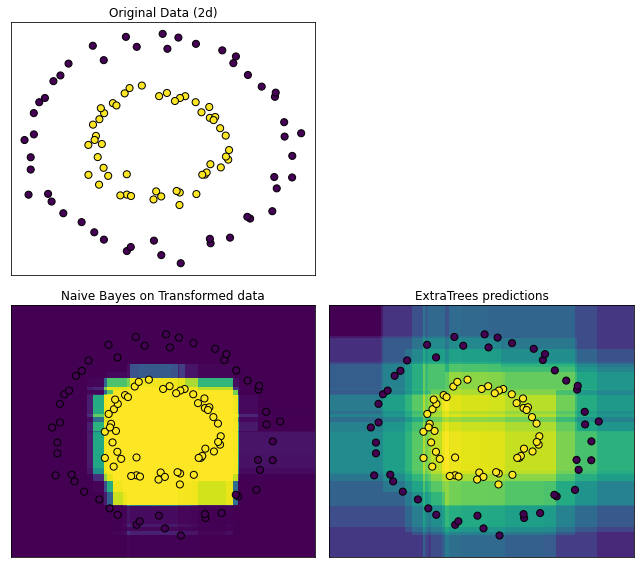

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import BernoulliNB
X, y = make_circles(factor=0.5, random_state=0, noise=0.05)
hasher = RandomTreesEmbedding(n_estimators=10, random_state=0, max_depth=3)
X_transformed = hasher.fit_transform(X)
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X_transformed)
nb = BernoulliNB()
nb.fit(X_transformed, y)

trees = ExtraTreesClassifier(max_depth=3, n_estimators=10, random_state=0)
trees.fit(X, y)
fig = plt.figure(figsize=(9, 8))
ax = plt.subplot(221)
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
ax.set_title("Original Data (2d)")
ax.set_xticks(())
ax.set_yticks(())
h = 0.01

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
transformed_grid = hasher.transform(np.c_[xx.ravel(), yy.ravel()])
y_grid_pred = nb.predict_proba(transformed_grid)[:, 1]

ax = plt.subplot(223)
ax.set_title("Naive Bayes on Transformed data")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())

y_grid_pred = trees.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

ax = plt.subplot(224)
ax.set_title("ExtraTrees predictions")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())
plt.tight_layout()
plt.show()

### RandomTreesEmbedding

In [18]:
from sklearn.ensemble import RandomTreesEmbedding
X = [[0, 0], [1, 0], [0, 1], [-1, 0], [0, -1]]
random_trees = RandomTreesEmbedding(n_estimators=5, random_state=0, max_depth=1).fit(X)
X_sparse_embedding = random_trees.transform(X)
X_sparse_embedding.toarray()

array([[0., 1., 1., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 1., 0., 0., 1., 1., 0.]])

### Adaboost

In [20]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X, y)
print(regr.score(X, y))
regr.predict([[0, 0, 0, 0]])

0.9771376939813695


array([4.79722349])

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.9466666666666665

### Gradient Boosting

In [24]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
X, y = make_regression(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
print(reg.predict(X_test[1:2]))
reg.score(X_test, y_test)

[-61.05212593]


0.4275453588288015

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=13)
params = {
    'n_estimators':500,
    'max_depth':4,
    'min_samples_split':5,
    'learning_rate':0.01,
    'loss':'ls'
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 3037.1775


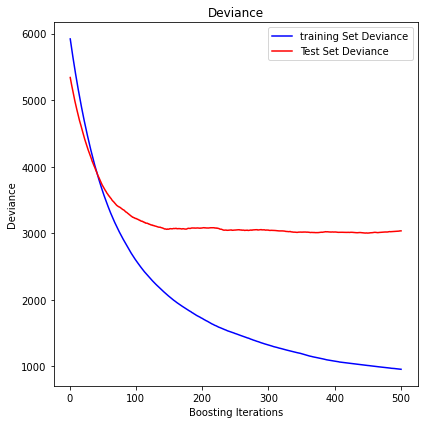

In [28]:
test_score = np.zeros((params["n_estimators"]), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-', label="training Set Deviance")
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-', label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

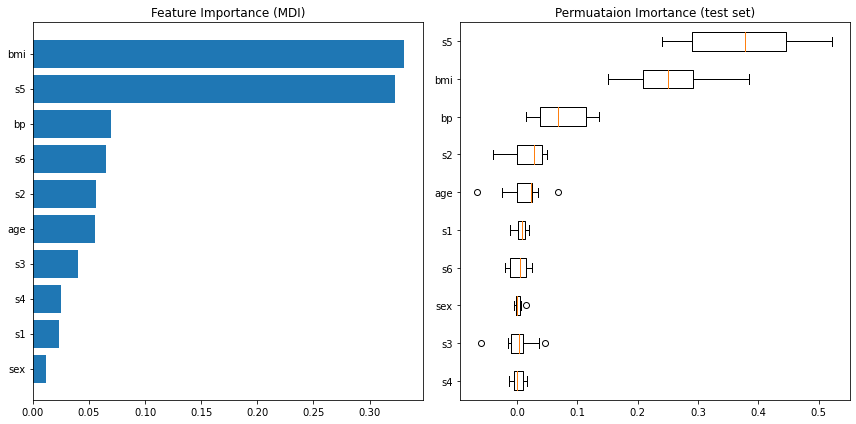

In [31]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(diabetes.feature_names)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(diabetes.feature_names)[sorted_idx])
plt.title("Permuataion Imortance (test set)")
fig.tight_layout()
plt.show()

In [33]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
X, y = make_hastie_10_2(random_state=0)
X_train, Xtest = X[:2000], X[2000:] 
y_train, y_test = y[:2000], y[2000:]
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(Xtest, y_test)

0.913

In [1]:
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
RANDOM_STATE = 123
X, y = make_classification(n_samples=500, n_features=25, n_clusters_per_class=1, n_informative=15, random_state=RANDOM_STATE)
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'", RandomForestClassifier(warm_start=True, oob_score=True,
                                                                           max_features='sqrt', random_state = RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'", RandomForestClassifier(warm_start=True, oob_score=True,
                                                                           max_features='log2', random_state = RANDOM_STATE)),
    ("RandomForestClassifier, max_features='none'", RandomForestClassifier(warm_start=True, oob_score=True,
                                                                           max_features=None, random_state = RANDOM_STATE)),
]
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
error_rate

OrderedDict([("RandomForestClassifier, max_features='sqrt'", []),
             ("RandomForestClassifier, max_features='log2'", []),
             ("RandomForestClassifier, max_features='none'", [])])

In [3]:
min_estimators = 15
max_estimators = 175
for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)
        oob_error = 1- clf.oob_score_
        error_rate[label].append((i, oob_error))
error_rate

OrderedDict([("RandomForestClassifier, max_features='sqrt'",
              [(15, 0.11399999999999999),
               (16, 0.124),
               (17, 0.10199999999999998),
               (18, 0.10199999999999998),
               (19, 0.09799999999999998),
               (20, 0.09599999999999997),
               (21, 0.08799999999999997),
               (22, 0.08999999999999997),
               (23, 0.08399999999999996),
               (24, 0.07999999999999996),
               (25, 0.07999999999999996),
               (26, 0.08199999999999996),
               (27, 0.08199999999999996),
               (28, 0.08599999999999997),
               (29, 0.08799999999999997),
               (30, 0.08599999999999997),
               (31, 0.08399999999999996),
               (32, 0.08199999999999996),
               (33, 0.07799999999999996),
               (34, 0.08399999999999996),
               (35, 0.08599999999999997),
               (36, 0.08399999999999996),
               (37, 0.0779999

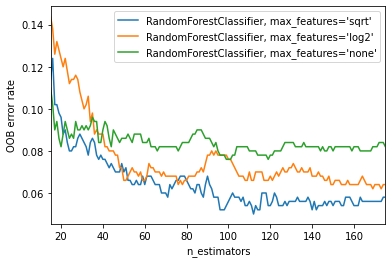

In [4]:
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [5]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
X, y = make_hastie_10_2(random_state=0)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)
clf.feature_importances_

array([0.10684213, 0.10461707, 0.11265447, 0.09863589, 0.09469133,
       0.10729306, 0.09163753, 0.09718194, 0.09581415, 0.09063242])

### HistGradientBoostingClassifier and Regressor

In [7]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
clf = HistGradientBoostingClassifier().fit(X, y)
clf.score(X, y)

1.0

In [8]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)
clf = HistGradientBoostingRegressor().fit(X, y)
clf.score(X, y)

0.9299589575098558

In [9]:
X = [
    [1, 0],
    [1, 0],
    [1, 0],
    [0, 1]
]
y = [0, 0, 1, 1]
sample_weight = [0, 0, 1, 1]
gb = HistGradientBoostingClassifier(min_samples_leaf=1)
gb.fit(X, y, sample_weight=sample_weight)
print(gb.predict([[1, 0]]))
gb.predict_proba([[1, 0]])[0, 1]

[1]


0.9999999999999998

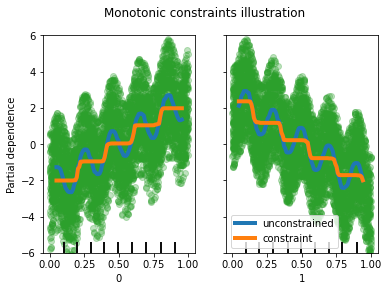

In [15]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import plot_partial_dependence
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.RandomState(0)
n_samples = 5000
f_0 = rng.rand(n_samples)
f_1 = rng.rand(n_samples)
X = np.c_[f_0, f_1]
noise = rng.normal(loc=0.0, scale=0.01, size=n_samples)
y = (5 * f_0 + np.sin(10 * np.pi * f_0) - 5 * f_1 - np.cos(10 * np.pi * f_1) + noise)
fig, ax = plt.subplots()
gbdt = HistGradientBoostingRegressor()
gbdt.fit(X, y)
disp = plot_partial_dependence(gbdt, X, features = [0, 1], line_kw = {"linewidth":4, "label":"unconstrained",
                                                                      "color":"tab:blue"}, ax=ax)
gbdt = HistGradientBoostingRegressor(monotonic_cst=[1, -1])
gbdt.fit(X, y)
plot_partial_dependence(gbdt, X, features=[0, 1], feature_names=("First feature\nPositive constraint", 
                                                                "second feature\nNegative constraint"), 
                       line_kw={"linewidth":4, "label":"constraint", "color":"tab:orange"}, ax=disp.axes_)
for f_idx in (0, 1):
    disp.axes_[0, f_idx].plot(X[:, f_idx], y, "o", alpha=0.3, zorder=-1, color="tab:green")
    disp.axes_[0, f_idx].set_ylim(-6, 6)
plt.legend()
fig.suptitle("Monotonic constraints illustration")
plt.show()

### Voting Classifier

In [19]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target
clf1 = LogisticRegression()
clf3 = GaussianNB()
clf2 = RandomForestClassifier()
eclf = VotingClassifier(estimators = [("lr", clf1), ("rf", clf2), ('gnb', clf3)], voting='hard')
for clf, label in zip([clf1, clf2, clf3, eclf], ["Logistic Regression", "Random Forest", "naive_bayes", "Ensemble"]):
    scores = cross_val_score(clf, X, y, scoring="accuracy", cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" %(scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.95 (+/- 0.03) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive_bayes]
Accuracy: 0.95 (+/- 0.03) [Ensemble]


In [22]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)], voting='soft', weights=[2, 1, 2])
clf1 = clf1.fit(X, y)
clf2 = clf2.fit(X, y)
clf3 = clf3.fit(X, y)
eclf = eclf.fit(X, y)

In [26]:
from sklearn.model_selection import GridSearchCV
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators = [("lr", clf1), ("rf", clf2), ('gnb', clf3)], voting='soft')
params = {'lr__C':[1.0, 100.0], 'rf__n_estimators':[20, 200]}
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(iris.data, iris.target)

c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [27]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting="soft")


In [28]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[2, 5, 1])

### Voting Regressor

In [3]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
X, y = load_diabetes(return_X_y = True)
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators = [('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg.fit(X, y)

VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=1)),
                            ('rf', RandomForestRegressor(random_state=1)),
                            ('lr', LinearRegression())])

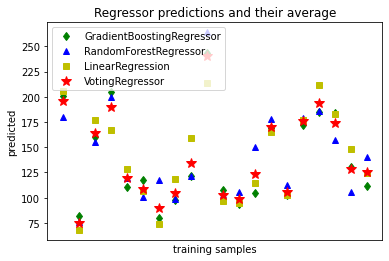

In [6]:
import matplotlib.pyplot as plt
reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)
xt = X[:20]
pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)
plt.figure()
plt.plot(pred1, 'gd', label='GradientBoostingRegressor')
plt.plot(pred2, 'b^', label='RandomForestRegressor')
plt.plot(pred3, 'ys', label="LinearRegression")
plt.plot(pred4, 'r*', ms=10, label="VotingRegressor")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')
plt.show()

### StackingClassifier and Regressor

In [10]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
X, y = load_iris(return_X_y=True)
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
              ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]
clf = StackingClassifier(estimators = estimators, final_estimator=LogisticRegression())
X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, random_state=42)
clf.fit(X_train, Y_train).score(X_test, Y_test)

0.9473684210526315

In [13]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
estimators = [("ridge", RidgeCV()), ("lasso", LassoCV(random_state=42)),
              ("knr", KNeighborsRegressor(n_neighbors=20, metric='euclidean'))]
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
final_estimator = GradientBoostingRegressor(n_estimators=25, subsample=0.5, min_samples_leaf=25,
                                            max_features=1, random_state=42)
reg = StackingRegressor(estimators = estimators, final_estimator = final_estimator)
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y = True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
from sklearn.metrics import r2_score
print("R2 score", r2_score(y_test, y_pred))

R2 score 0.5267013426135393


# Multiclass Classification

### One Vs Rest

In [3]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
X = np.array([[10, 10], [8, 10], [-5, 5.5], [-5.4, 5.5], [-20, -20], [-15, -20]])
y = np.array([0, 0, 1, 1, 2, 2])
clf = OneVsRestClassifier(SVC()).fit(X, y)
clf.predict([[-19, -20], [9, 9], [-5, 5]])

array([2, 0, 1])

In [8]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
X, y = datasets.load_iris(return_X_y=True)
OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X)

c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

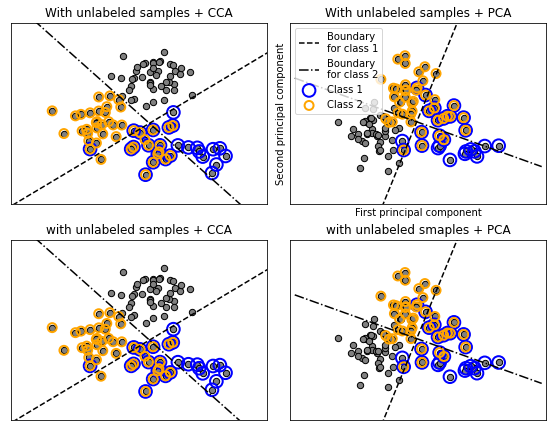

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)
    
def plot_subfigure(X, y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, y).transform(X)
    else:
        return ValueError
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    
    classif = OneVsRestClassifier(SVC(kernel="linear"))
    classif.fit(X, y)
    plt.subplot(2, 2, subplot)
    plt.title(title)
    
    zero_class = np.where(y[:, 0])
    one_class = np.where(y[:, 1])
    plt.scatter(X[:, 0], X[:, 1], s=40, c="gray", edgecolors=(0, 0, 0))
    plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b', facecolors='none', linewidths=2, label='Class 1')
    plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange', facecolors='none', linewidths=2,
                label="Class 2")
    plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--', 'Boundary\nfor class 1')
    plot_hyperplane(classif.estimators_[1], min_x, max_x, "k-.", "Boundary\nfor class 2")
    plt.xticks(())
    plt.yticks(())
    plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    if subplot == 2:
        plt.xlabel("First principal component")
        plt.ylabel("Second principal component")
        plt.legend(loc="upper left")

plt.figure(figsize=(8, 6))
X, y = make_multilabel_classification(n_classes=2, n_labels=1, allow_unlabeled=True, random_state=1)

plot_subfigure(X, y, 1, "With unlabeled samples + CCA", "cca")
plot_subfigure(X, y, 2, "With unlabeled samples + PCA", "pca")
X, y = make_multilabel_classification(n_classes = 2, n_labels=1, allow_unlabeled = True, random_state=1)

plot_subfigure(X, y, 3, "with unlabeled samples + CCA", "cca")
plot_subfigure(X, y, 4, "with unlabeled smaples + PCA", "pca")
plt.subplots_adjust(0.04, 0.02, .97, .94, .09, .2)
plt.show()

### One Vs One

In [17]:
from sklearn import datasets
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
X, y = datasets.load_iris(return_X_y=True)
OneVsOneClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X)

c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
X, y = load_iris(return_X_y=True)
X_train, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=0)
clf = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, ytrain)
clf.predict(Xtest[:10])

c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

### Output Code Classifier

In [20]:
from sklearn import datasets
from sklearn.multiclass import OutputCodeClassifier
from sklearn.svm import LinearSVC
X, y = datasets.load_iris(return_X_y=True)
clf = OutputCodeClassifier(LinearSVC(random_state=0), code_size=2, random_state=0)
clf.fit(X, y).predict(X)

c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = OutputCodeClassifier(estimator=RandomForestClassifier(random_state=0), random_state=0).fit(X, y)
clf.predict([[0, 0, 0, 0]])

array([1])

In [7]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
y = np.array(['apple', 'pear', 'apple', 'orange'])
y_dense = LabelBinarizer().fit_transform(y)
print(y_dense)
from scipy import sparse
y_sparse = sparse.csr_matrix(y_dense)
print(y_sparse)

[[1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]]
  (0, 0)	1
  (1, 2)	1
  (2, 0)	1
  (3, 1)	1


# Multilabel Classification

In [3]:
import numpy as np
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
X, y = make_multilabel_classification(n_classes=3, random_state=0)
clf = MultiOutputClassifier(KNeighborsClassifier()).fit(X, y)
clf.predict(X[-2:])

array([[1, 1, 0],
       [1, 1, 1]])

### MultiOutput Classifier

In [5]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import numpy as np
X, y1 = make_classification(n_samples=10, n_features=100, n_informative=30, n_classes=3, random_state=1)
y2 = shuffle(y1, random_state=1)
y3 = shuffle(y1, random_state=2)
Y = np.vstack((y1, y2, y3)).T
n_samples, n_features = X.shape
n_outputs = Y.shape[1]
n_classes = 3
forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(X, Y).predict(X)

array([[2, 2, 0],
       [1, 2, 1],
       [2, 1, 0],
       [0, 0, 2],
       [0, 2, 1],
       [0, 0, 2],
       [1, 1, 0],
       [1, 1, 1],
       [0, 0, 2],
       [2, 0, 0]])

### Classifier Chain

In [6]:
from sklearn.datasets import make_multilabel_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.multioutput import ClassifierChain
X, Y = make_multilabel_classification(n_samples=12, n_classes=3, random_state=0)
X_train, X_test, y_train, y_test =  train_test_split(X, Y, random_state=0)
base_lr = LogisticRegression(solver='lbfgs', random_state=0)
chain = ClassifierChain(base_lr, order='random', random_state=0)
chain.fit(X_train, y_train).predict(X_test)

array([[1., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [7]:
chain.predict_proba(X_test)

array([[0.83873122, 0.94314231, 0.4576149 ],
       [0.88781656, 0.3684047 , 0.26409868],
       [0.03213614, 0.99359669, 0.06257921]])

### Multioutput Regressor

In [8]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
X, y = make_regression(n_samples=10, n_targets=3, random_state=1)
MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X, y).predict(X)

array([[-154.75474165, -147.03498585,  -50.03812219],
       [   7.12165031,    5.12914884,  -81.46081961],
       [-187.8948621 , -100.44373091,   13.88978285],
       [-141.62745778,   95.02891072, -191.48204257],
       [  97.03260883,  165.34867495,  139.52003279],
       [ 123.92529176,   21.25719016,   -7.84253   ],
       [-122.25193977,  -85.16443186, -107.12274212],
       [ -30.170388  ,  -94.80956739,   12.16979946],
       [ 140.72667194,  176.50941682,  -17.50447799],
       [ 149.37967282,  -81.15699552,   -5.72850319]])

In [11]:
from sklearn.multioutput import RegressorChain
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial')
X, Y = [[1, 0], [0, 1], [1, 1]], [[0, 2], [1, 1], [2, 0]]
chain = RegressorChain(base_estimator=logreg, order=[0, 1]).fit(X, Y)
chain.predict(X)

array([[0., 2.],
       [1., 1.],
       [2., 0.]])

# Feature selection

### Removing features with low variance

In [14]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

### Univariate feature selection

In [2]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X, y = load_iris(return_X_y=True)
print(X.shape)
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 4)


(150, 2)

In [4]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
X, y = load_digits(return_X_y=True)
print(X.shape)
X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)
X_new.shape

(1797, 64)


(1797, 7)

classification accuracy withoutselecting features: 0.789
Classification accuracy after univariate feature selection: 0.868


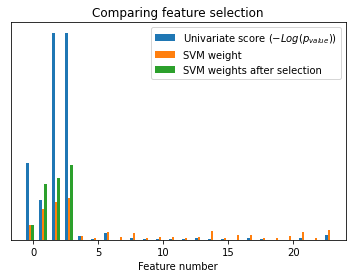

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
X, y = load_iris(return_X_y = True)
E = np.random.RandomState(42).uniform(0, 0.1, size=(X.shape[0], 20))
X = np.hstack((X, E))
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
plt.figure(1)
plt.clf()
X_indices = np.arange(X.shape[-1])
selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2, label=r'Univariate score ($-Log(p_{value})$)')
clf = make_pipeline(MinMaxScaler(), LinearSVC())
clf.fit(X_train, y_train)
print("classification accuracy withoutselecting features: {:.3f}".format(clf.score(X_test, y_test)))
svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()
plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight')
clf_selected = make_pipeline(SelectKBest(f_classif, k=4), MinMaxScaler(), LinearSVC())
clf_selected.fit(X_train, y_train)
print('Classification accuracy after univariate feature selection: {:.3f}'.format(clf_selected.score(X_test, y_test)))
svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()
plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected, width=.2, label="SVM weights after selection")
plt.title("Comparing feature selection")
plt.xlabel("Feature number")
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

In [10]:
selector.pvalues_

array([1.30445334e-24, 4.69398374e-13, 7.86826504e-65, 6.71208699e-65,
       9.19263331e-02, 7.68247566e-01, 6.97135407e-03, 8.71072262e-01,
       2.89870410e-01, 5.17260313e-01, 6.93915953e-01, 6.38021592e-01,
       5.40267165e-01, 3.89960477e-01, 6.61741719e-01, 4.45807702e-01,
       8.70827786e-01, 2.77518368e-01, 7.02334600e-01, 9.10686642e-01,
       8.49305964e-01, 3.24574351e-01, 8.42484503e-01, 2.86600077e-02])

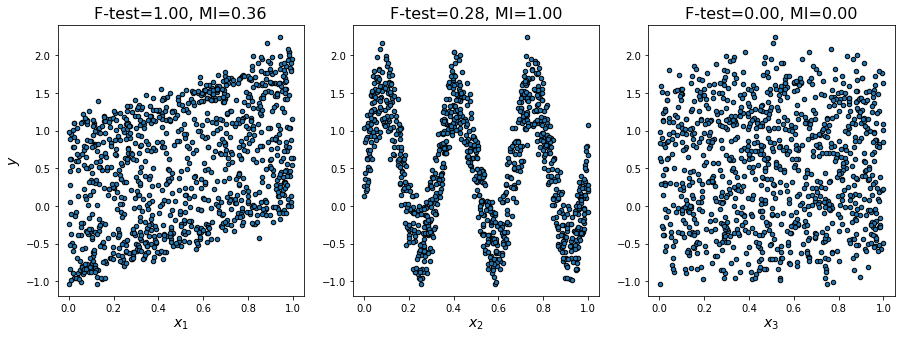

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression
np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)
mi = mutual_info_regression(X, y)
mi /= np.max(mi)
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]), fontsize=16)
plt.show()

### Recursive feature elimination(RFE)

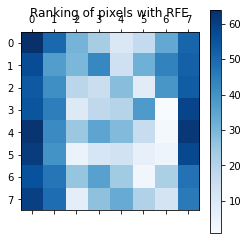

In [15]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target
svc = SVC(kernel='linear', C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

Optimal number of features: 3


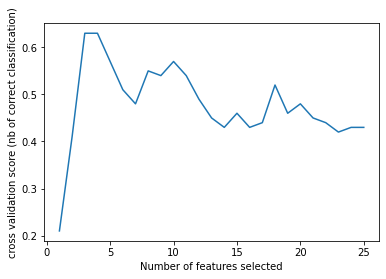

In [16]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=25, n_informative=3, n_redundant=2, n_repeated=0, n_classes=8,
                          n_clusters_per_class=1, random_state=0)
svc = SVC(kernel="linear")
min_features_to_select=1
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(X, y)
print("Optimal number of features: %d"%rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("cross validation score (nb of correct classification)")
plt.plot(range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select), rfecv.grid_scores_)
plt.show()

### Modal-based and sequential feature selection(SelectFromModal)

In [35]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
X = [
    [0.87, -1.34, 0.31],
    [-2.79, -0.02, -0.85],
    [-1.34, -0.48, -2.55],
    [1.92, 1.48, 0.65]
]
y = [0, 1, 0, 1]
selector = SelectFromModel(estimator=LogisticRegression()).fit(X, y)
print(selector.estimator_.coef_)
print(selector.threshold_)
print(selector.get_support())
print(selector.transform(X))

[[-0.3252302   0.83462377  0.49750423]]
0.5524527319086915
[False  True False]
[[-1.34]
 [-0.02]
 [-0.48]
 [ 1.48]]


In [36]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y=True)
print(X.shape)
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 4)


c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


(150, 3)

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y = True)
print(X.shape)
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
print(clf.feature_importances_)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 4)
[0.08634618 0.05383756 0.45027051 0.40954575]


(150, 2)

In [47]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([('feature_Selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))), ("classification", RandomForestClassifier())])
clf.fit(X, y)

c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('feature_Selection',
                 SelectFromModel(estimator=LinearSVC(dual=False,
                                                     penalty='l1'))),
                ('classification', RandomForestClassifier())])

# Semi-supervised learning

In [60]:
from sklearn.semi_supervised import LabelPropagation
import numpy as np
from sklearn import datasets
label_prop_model = LabelPropagation()
iris = datasets.load_iris()
rng = np.random.RandomState(42)
random_unlabeled_points = rng.rand(len(iris.target)) < 0.3
labels = np.copy(iris.target)
labels[random_unlabeled_points] = -1
label_prop_model.fit(iris.data, labels)

LabelPropagation()

In [62]:
import numpy as np
from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading
label_prop_model = LabelSpreading()
iris = datasets.load_iris()
rng = np.random.RandomState(42)
random_unlabeled_points = rng.rand(len(iris.target)) < 0.3
labels[random_unlabeled_points] = -1
label_prop_model.fit(iris.data, labels)

LabelSpreading()

Label Spreading model: 40 labeled & 300 ublabeled points (340 total)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.82      1.00      0.90        37
           2       1.00      0.86      0.92        28
           3       1.00      0.80      0.89        35
           4       0.92      1.00      0.96        24
           5       0.74      0.94      0.83        34
           6       0.89      0.96      0.92        25
           7       0.94      0.89      0.91        35
           8       1.00      0.68      0.81        31
           9       0.81      0.88      0.84        24

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300

confusion matrix
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  1 24  0  0  0  2  1  0  0]
 [ 0  0  0 28  0  5  0  1  0  1]
 [ 0  0  0  0 24  0  0 

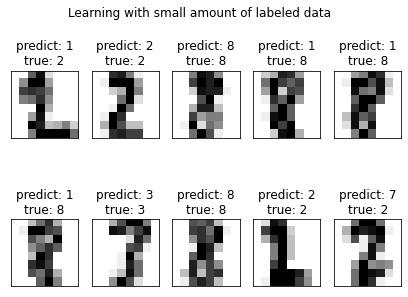

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.semi_supervised import LabelSpreading
digits = datasets.load_digits()
rng = np.random.RandomState(2)
indices = np.arange(len(digits.data))
rng.shuffle(indices)
X = digits.data[indices[:340]]
y = digits.target[indices[:340]]
images = digits.images[indices[:340]]
n_total_samples = len(y)
n_labeled_points = 40
indices = np.arange(n_total_samples)
unlabeled_set = indices[n_labeled_points:]
y_train = np.copy(y)
y_train[unlabeled_set] =-1

lp_model = LabelSpreading(gamma=.25, max_iter=20)
lp_model.fit(X, y_train)
predicted_labels = lp_model.transduction_[unlabeled_set]
true_labels = y[unlabeled_set]
cm = confusion_matrix(true_labels, predicted_labels, labels=lp_model.classes_)
print("Label Spreading model: %d labeled & %d ublabeled points (%d total)"
      %(n_labeled_points, n_total_samples - n_labeled_points, n_total_samples))
print(classification_report(true_labels, predicted_labels))
print("confusion matrix")
print(cm)
pred_entropies = stats.distributions.entropy(lp_model.label_distributions_.T)
uncertainty_index = np.argsort(pred_entropies)[-10:]
f = plt.figure(figsize=(7, 5))
for index, image_index in enumerate(uncertainty_index):
    image = images[image_index]
    sub = f.add_subplot(2, 5, index + 1)
    sub.imshow(image, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    sub.set_title("predict: %i\ntrue: %i"%(lp_model.transduction_[image_index], y[image_index]))
f.suptitle("Learning with small amount of labeled data")
plt.show()

# Isotonic Regression

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state
n = 100
x = np.arange(n)
rs = check_random_state(0)
y = rs.randint(-50, 50, size=(n, )) + 5 * np.log1p(np.arange(n))

In [12]:
ir = IsotonicRegression(out_of_bounds="clip")
y_ = ir.fit_transform(x, y)
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)

LinearRegression()

# Probability calibration

In [21]:
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)
base_clf = GaussianNB()
calibrated_clf = CalibratedClassifierCV(base_estimator=base_clf, cv=3)
calibrated_clf.fit(X, y)

CalibratedClassifierCV(base_estimator=GaussianNB(), cv=3)

In [24]:
len(calibrated_clf.calibrated_classifiers_)

3

In [25]:
calibrated_clf.predict_proba(X)[:5, :]

array([[0.11009913, 0.88990087],
       [0.07226373, 0.92773627],
       [0.92831861, 0.07168139],
       [0.9283446 , 0.0716554 ],
       [0.07186091, 0.92813909]])

In [28]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X, y, random_state=42)
base_clf = GaussianNB()
base_clf.fit(X_train, y_train)
calibrated_clf = CalibratedClassifierCV(base_estimator=base_clf, cv='prefit')
print(calibrated_clf.fit(X_calib, y_calib))
print(len(calibrated_clf.calibrated_classifiers_))
calibrated_clf.predict_proba([[-0.5, 0.5]])

CalibratedClassifierCV(base_estimator=GaussianNB(), cv='prefit')
1


array([[0.93677315, 0.06322685]])

Logistic
	Brier: 0.099
	Precision: 0.872
	Recall: 0.851
	F1: 0.862

Naive Bayes
	Brier: 0.118
	Precision: 0.857
	Recall: 0.876
	F1: 0.867

Naive Bayes + Isotonic
	Brier: 0.098
	Precision: 0.883
	Recall: 0.836
	F1: 0.859

Naive Bayes + Sigmoid
	Brier: 0.109
	Precision: 0.861
	Recall: 0.871
	F1: 0.866



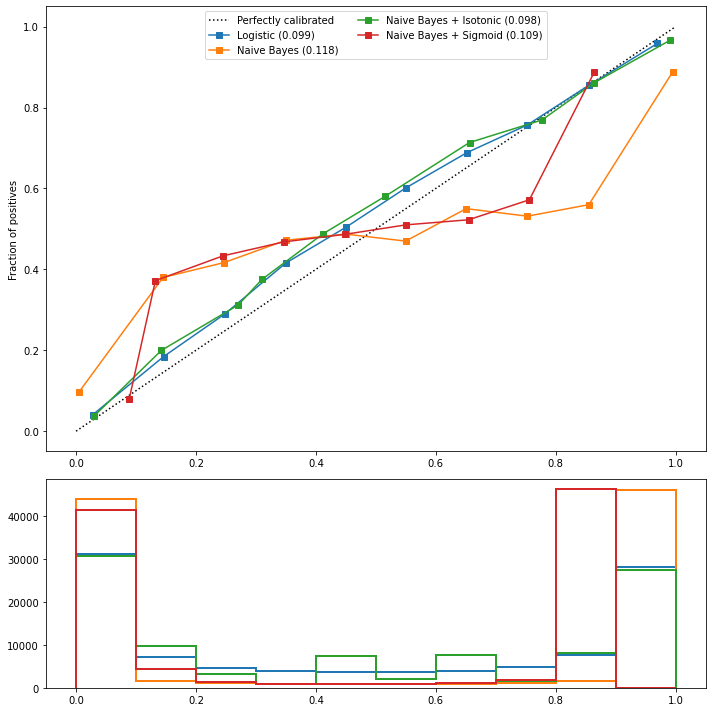

In [7]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
X, y = datasets.make_classification(n_samples=100000, n_features=20, n_informative=2, n_redundant=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42)
def plot_calibration_curve(est, name, fig_index):
    isotonic = CalibratedClassifierCV(est, cv=2, method='isotonic')
    sigmoid = CalibratedClassifierCV(est, cv=2, method='sigmoid')
    lr = LogisticRegression(C=1.)
    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr, 'Logistic'), (est, name), (isotonic, name + " + Isotonic"), (sigmoid, name + ' + Sigmoid')]:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:
            prob_pos = clf.decision_function(X_test)
            prob_prob = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        clf_score = brier_score_loss(y_test, prob_pos, pos_label=y.max())
        print(name)
        print("\tBrier: %1.3f" %clf_score)
        print("\tPrecision: %1.3f"%precision_score(y_test, y_pred))
        print("\tRecall: %1.3f"%recall_score(y_test, y_pred))
        print("\tF1: %1.3f\n"%f1_score(y_test, y_pred))
        fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
        ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s (%1.3f)"%(name, clf_score))
        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name, histtype="step", lw=2)
    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="upper center", ncol=2)
    plt.tight_layout()
plot_calibration_curve(GaussianNB(), "Naive Bayes", 1)
plt.show()

In [8]:
import numpy as np
from sklearn.datasets import make_blobs
np.random.seed(0)
X, y = make_blobs(n_samples=2000, n_features=2, centers = 3, random_state=42, cluster_std=5.0)
X_train, y_train = X[:600], y[:600]
X_valid, y_valid = X[600:1000], y[600:1000]
X_train_valid, y_train_valid = X[:1000], y[:1000]
X_test, y_test= X[1000:], y[1000:]

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=25)
clf.fit(X_train_valid, y_train_valid)

RandomForestClassifier(n_estimators=25)

In [10]:
from sklearn.calibration import CalibratedClassifierCV
cal_clf = CalibratedClassifierCV(clf, method="sigmoid", cv="prefit")
cal_clf.fit(X_valid, y_valid)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=25),
                       cv='prefit')

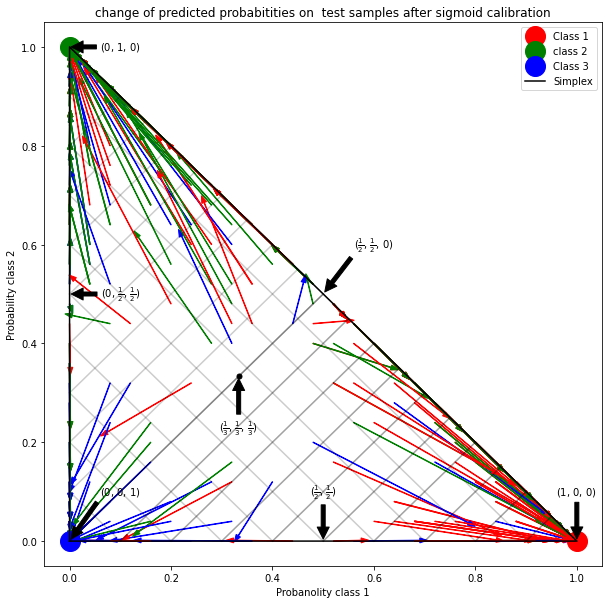

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
colors = ["r", "g", "b"]
clf_probs = clf.predict_proba(X_test)
cal_clf_probs = cal_clf.predict_proba(X_test)

for i in range(clf_probs.shape[0]):
    plt.arrow(clf_probs[i, 0], clf_probs[i, 1], cal_clf_probs[i, 0] - clf_probs[i, 0]
              , cal_clf_probs[i, 1] - clf_probs[i, 1], color=colors[y_test[i]], head_width=1e-2)
plt.plot([1.0], [0.0], 'ro', ms=20, label="Class 1")
plt.plot([0.0], [1.0], "go", ms=20, label="class 2")
plt.plot([0.0], [0.0], 'bo', ms=20, label="Class 3")

plt.plot([0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], 'k', label="Simplex")

plt.annotate(r'($\frac{1}{3}$, $\frac{1}{3}$, $\frac{1}{3}$)', xy = (1.0 / 3, 1.0/3), xytext=(1.0/3, .23), xycoords="data",
            arrowprops = dict(facecolor='black', shrink=0.05), horizontalalignment='center', verticalalignment='center')
plt.plot([1.0/3], [1.0/3], 'ko', ms=5)
plt.annotate(r'($\frac{1}{2}$, $\frac{1}{2}$)', xy = (.5, .0), xytext=(.5, .1), xycoords="data",
            arrowprops = dict(facecolor='black', shrink=0.05), horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($0$, $\frac{1}{2}$, $\frac{1}{2}$)', xy = (.0, .5), xytext=(.1, .5), xycoords="data",
            arrowprops = dict(facecolor='black', shrink=0.05), horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($\frac{1}{2}$, $\frac{1}{2}$, $0$)', xy = (.5, .5), xytext=(.6, .6), xycoords="data",
            arrowprops = dict(facecolor='black', shrink=0.05), horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($0$, $0$, $1$)', xy = (0, 0), xytext=(.1, .1), xycoords="data",
            arrowprops = dict(facecolor='black', shrink=0.05), horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($1$, $0$, $0$)', xy = (1, 0), xytext=(1, .1), xycoords="data",
            arrowprops = dict(facecolor='black', shrink=0.05), horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($0$, $1$, $0$)', xy = (0, 1), xytext=(.1, 1), xycoords="data",
            arrowprops = dict(facecolor='black', shrink=0.05), horizontalalignment='center', verticalalignment='center')

plt.grid(False)
for x in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    plt.plot([0, x], [x, 0], 'k', alpha=0.2)
    plt.plot([0, 0 + (1 - x)/2], [x, x + (1-x)/2], 'k', alpha=0.2)
    plt.plot([x, x + (1-x)/2], [0, 0 + (1-x)/2], 'k', alpha=0.2)
    plt.plot([x, x + (1-x)/2], [0, 0 + (1-x)/2], 'k', alpha=0.2)
plt.title("change of predicted probabitities on  test samples after sigmoid calibration")
plt.xlabel("Probanolity class 1")
plt.ylabel("Probability class 2")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
_ = plt.legend(loc="best")

In [14]:
from sklearn.metrics import log_loss
score = log_loss(y_test, clf_probs)
cal_score = log_loss(y_test, clf_probs)
cal_score = log_loss(y_test, cal_clf_probs)
print("Log-loss of")
print(f" * uncalibrated classifier:{score:.3f}")
print(f" * calibrated classifier: {cal_score:.3f}")

Log-loss of
 * uncalibrated classifier:1.485
 * calibrated classifier: 0.803


# Neural Network

### MPLClassifier

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
print(clf.predict_proba(X_test[:1]))
print(clf.predict(X_test[:5, :]))
print(clf.score(X_test, y_test))

[[0.03838405 0.96161595]]
[1 0 1 0 1]
0.88


In [35]:
from sklearn.neural_network import MLPClassifier
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [36]:
clf.predict([[2, 2], [-1, 2]])

array([1, 0])

In [37]:
[coef.shape for coef in clf.coefs_]

[(2, 5), (5, 2), (2, 1)]

In [38]:
clf.predict_proba([[2, 2], [1, 2]])

array([[1.96718015e-04, 9.99803282e-01],
       [1.96718015e-04, 9.99803282e-01]])

In [39]:
X = [[0, 0], [1, 1]]
y = [[0, 1], [1, 1]]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, ), random_state=1)
clf.fit(X, y)
print(clf.predict([[1, 2]]))
print(clf.predict([[0, 0]]))

[[1 1]]
[[0 1]]



learning on datasets iris
training: constant learning-rate
Training set score: 0.980000
Training set loss: 0.096950
training: constant with momentum
Training set score: 0.980000
Training set loss: 0.049530
training: constant with Nesterovs momentum
Training set score: 0.980000
Training set loss: 0.049540
training: inv-scaling learning-rate
Training set score: 0.360000
Training set loss: 0.978444
training: inv-scaling with momentum
Training set score: 0.860000
Training set loss: 0.503452
training: inv-scaling with Nesterov's momentum
Training set score: 0.860000
Training set loss: 0.504185
training: adam
Training set score: 0.980000
Training set loss: 0.045311

learning on datasets digits
training: constant learning-rate
Training set score: 0.956038
Training set loss: 0.243802
training: constant with momentum
Training set score: 0.992766
Training set loss: 0.041297
training: constant with Nesterovs momentum
Training set score: 0.993879
Training set loss: 0.042898
training: inv-scaling 

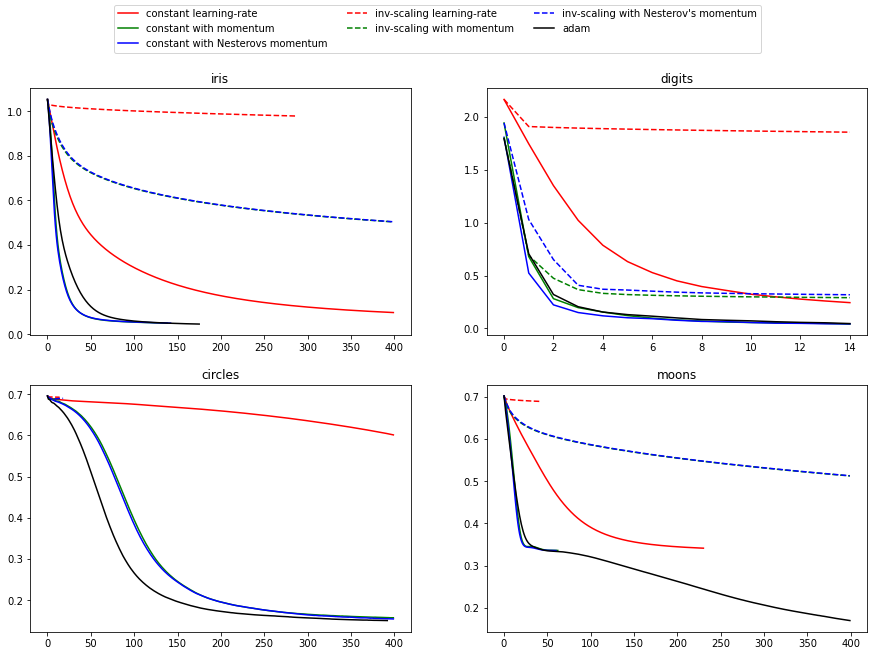

In [11]:
import warnings
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning
params = [{'solver': 'sgd', 'learning_rate':'constant', 'momentum':0, 'learning_rate_init':0.2},
         {'solver': 'sgd', 'learning_rate':'constant', 'momentum':0.9, 'nesterovs_momentum':False, 'learning_rate_init':0.2},
         {'solver': 'sgd', 'learning_rate':'constant', 'momentum':0.9, 'nesterovs_momentum':True, 'learning_rate_init':0.2},
         {'solver': 'sgd', 'learning_rate':'invscaling', 'momentum':0, 'learning_rate_init':0.2},
         {'solver': 'sgd', 'learning_rate':'invscaling', 'momentum':0.9, 'nesterovs_momentum':True, 'learning_rate_init':0.2},
         {'solver': 'sgd', 'learning_rate':'invscaling', 'momentum':0.9, 'nesterovs_momentum':False, 'learning_rate_init':0.2},
         {'solver':'adam', 'learning_rate_init':0.01}]
labels = ["constant learning-rate", "constant with momentum", 'constant with Nesterovs momentum',
          "inv-scaling learning-rate", "inv-scaling with momentum", "inv-scaling with Nesterov's momentum", "adam"]
plot_args = [{'c':'red', 'linestyle':'-'},
            {'c':'green', 'linestyle':'-'},
            {'c':'blue', 'linestyle':'-'},
            {'c':'red', 'linestyle':'--'},
            {'c':'green', 'linestyle':'--'},
            {'c':'blue', 'linestyle':'--'},
            {'c':'black', 'linestyle':'-'}]

def plot_on_datasets(X, y, ax, name):
    print("\nlearning on datasets %s"%name)
    ax.set_title(name)
    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        max_iter = 15
    else:
        max_iter = 400
    for label, param in zip(labels, params):
        print("training: %s"%label)
        mlp = MLPClassifier(random_state=0, max_iter=max_iter, **param)
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
            mlp.fit(X, y)
        mlps.append(mlp)
        print("Training set score: %f"%mlp.score(X, y))
        print("Training set loss: %f"%mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
iris = datasets.load_iris()
X_digits, y_digits = datasets.load_digits(return_X_y=True)
data_sets = [(iris.data, iris.target), (X_digits, y_digits), datasets.make_circles(noise=0.2, factor=0.5, random_state=1),
            datasets.make_moons(noise=0.3, random_state=0)]
for ax, data, name in zip(axes.ravel(), data_sets, ['iris', 'digits', 'circles', 'moons']):
    plot_on_datasets(*data, ax=ax, name=name)
fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\datasets\_openml.py:57: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355
Training set score: 0.986800
test set score: 0.970000


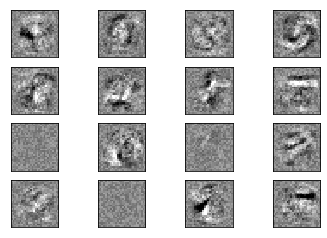

In [1]:
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]
mlp = MLPClassifier(hidden_layer_sizes=(50, ), max_iter=10, alpha=1e-4, solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)
print("Training set score: %f"%mlp.score(X_train, y_train))
print("test set score: %f"%mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

### MLPRegressor

In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X, y = make_regression(n_samples=200, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
print(regr.predict(X_test[:2]))
print(regr.score(X_test, y_test))

[-0.98506347 -7.19854141]
0.4162338898076594


c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


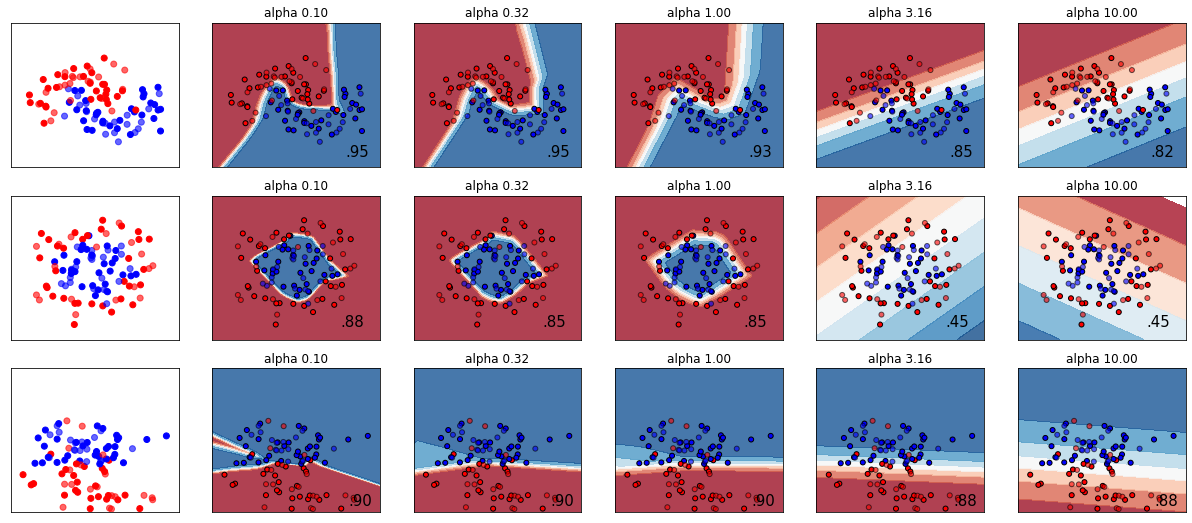

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
h = .02
alphas = np.logspace(-1, 1, 5)
classifiers = []
names = []
for alpha in alphas:
    classifiers.append(make_pipeline(StandardScaler(), MLPClassifier(solver="lbfgs", alpha=alpha, random_state=1,
                                                                    max_iter=2000, early_stopping=True, 
                                                                    hidden_layer_sizes=[100, 100])))
    names.append(f"alpha {alpha:.2f}")
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linear_separable = (X, y)
datasets = [make_moons(noise=0.3, random_state=0), make_circles(noise=0.2, factor=0.5, random_state=1), linear_separable]
figure = plt.figure(figsize=(17, 9))
i = 1
for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='black', s=25)
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='black', s=25)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f'%score).lstrip('0'), size=15, horizontalalignment='right')
        i += 1
figure.subplots_adjust(left=.02, right=.98)
plt.show()